In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame

import json
import calendar
import random

from datetime import date, timedelta

import faker

from delorean import parse

import matplotlib.pyplot as plt
plt.style.use('ggplot')
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn']


In [3]:
fake = faker.Faker()

In [4]:
usernames = set()
num_users = 1000

while len(usernames) < num_users: 
    username = fake.user_name() 
    usernames.add(username)

In [5]:
def get_random_name_and_gender():
    skew = .6 
    is_male = random.random() > skew
    if is_male:
        result = fake.name_male(), 'M'
    else:
        result = fake.name_female(), 'F' 
    return result

get_random_name_and_gender()

('Lacey Anderson', 'F')

In [6]:
def get_users(usernames): 
    users = []
    for username in usernames:
        name, gender = get_random_name_and_gender()
        user = {
            'username': username,
            'name': name,
            'gender': gender,
            'email': fake.email(),
            'age': fake.random_int(min=18, max = 90),
            'address': fake.address(),
        }
        users.append(json.dumps(user)) 
    return users

users = get_users(usernames)

users[0:2]

['{"username": "hortonarthur", "name": "Tammy Brown", "gender": "F", "email": "wwilliams@weber.com", "age": 45, "address": "93297 Warner Land\\nEast Joseph, ID 18159"}',
 '{"username": "alexandergarcia", "name": "Marcus Payne", "gender": "M", "email": "huntfernando@yahoo.com", "age": 45, "address": "2747 Jones Ports Apt. 717\\nBrianfurt, MN 64583"}']

In [7]:
def get_type():
    types = ['CPM', 'CPC', 'CPA'] 
    return random.choice(types)

get_type()

'CPC'

In [8]:
def get_start_end_dates():
    duration = random.randint(1, 2 * 365)
    offset = random.randint(-365, 365)
    
    start = date.today() - timedelta(days=offset)
    end = start + timedelta(days=duration)
    
    def _format_date(date_):

        return date_.strftime("%Y%m%d")
    return _format_date(start), _format_date(end)

get_start_end_dates()

('20160618', '20170328')

In [9]:
def get_age():
    age = random.randint(20, 45)
    age -= age % 5
    diff = random.randint(5, 25)
    diff -= diff % 5
    
    return'{}-{}'.format(age, age + diff)

get_age()

'30-35'

In [10]:
def get_gender():
    return random.choice(('M', 'F', 'B')) 

get_gender()

'F'

In [11]:
def get_currency():
    return random.choice(('GBP', 'EUR', 'USD')) 

get_currency()

'GBP'

In [12]:
def get_campaign_name(): 
    separator = '_'
    type_ = get_type()
    start_end = separator.join(get_start_end_dates())
    age = get_age()
    gender = get_gender()
    currency = get_currency()
    return separator.join((type_, start_end, age, gender, currency))

get_campaign_name()

'CPA_20180410_20190331_20-40_M_EUR'

In [13]:
def get_campaign_data():
    name = get_campaign_name()
    budget = random.randint(10**3, 10**6) 
    spent = random.randint(10**2, budget) 
    
    clicks = int(random.triangular(10**2, 10**5, 0.2 * 10**5))
    
    impressions = int(random.gauss(0.5 * 10**6, 2))
    
    return {
        'cmp_name': name, 
        'cmp_bgt': budget, 
        'cmp_spent': spent,
        'cmp_clicks': clicks,
        'cmp_impr': impressions
    }

get_campaign_data()

{'cmp_bgt': 171379,
 'cmp_clicks': 86129,
 'cmp_impr': 500001,
 'cmp_name': 'CPM_20170219_20180828_35-50_M_USD',
 'cmp_spent': 97148}

In [14]:
def get_data(users): 
    data = []
    for user in users:
        campaigns = [get_campaign_data() for _ in range(random.randint(2, 8))] 
        data.append({'user': user, 'campaigns': campaigns})
    return data

rough_data = get_data(users)

rough_data[0]

{'campaigns': [{'cmp_bgt': 37835,
   'cmp_clicks': 8339,
   'cmp_impr': 499996,
   'cmp_name': 'CPA_20180101_20190804_25-50_F_EUR',
   'cmp_spent': 9913},
  {'cmp_bgt': 910777,
   'cmp_clicks': 41759,
   'cmp_impr': 500001,
   'cmp_name': 'CPC_20170816_20181226_30-50_F_GBP',
   'cmp_spent': 758796},
  {'cmp_bgt': 93184,
   'cmp_clicks': 3295,
   'cmp_impr': 500002,
   'cmp_name': 'CPA_20160922_20170715_35-55_M_USD',
   'cmp_spent': 12198},
  {'cmp_bgt': 969983,
   'cmp_clicks': 19110,
   'cmp_impr': 499998,
   'cmp_name': 'CPM_20171129_20180919_25-35_F_GBP',
   'cmp_spent': 867448},
  {'cmp_bgt': 801460,
   'cmp_clicks': 74813,
   'cmp_impr': 499998,
   'cmp_name': 'CPA_20180422_20180509_40-45_M_USD',
   'cmp_spent': 128587},
  {'cmp_bgt': 260282,
   'cmp_clicks': 25606,
   'cmp_impr': 500001,
   'cmp_name': 'CPA_20160708_20170411_20-30_B_USD',
   'cmp_spent': 259834},
  {'cmp_bgt': 551760,
   'cmp_clicks': 19272,
   'cmp_impr': 499997,
   'cmp_name': 'CPA_20160708_20161031_40-55_B_GBP

In [15]:
data = []
for datum in rough_data:
    for campaign in datum['campaigns']:
        campaign.update({'user': datum['user']})
        data.append(campaign)
        
data[0:2]

[{'cmp_bgt': 37835,
  'cmp_clicks': 8339,
  'cmp_impr': 499996,
  'cmp_name': 'CPA_20180101_20190804_25-50_F_EUR',
  'cmp_spent': 9913,
  'user': '{"username": "hortonarthur", "name": "Tammy Brown", "gender": "F", "email": "wwilliams@weber.com", "age": 45, "address": "93297 Warner Land\\nEast Joseph, ID 18159"}'},
 {'cmp_bgt': 910777,
  'cmp_clicks': 41759,
  'cmp_impr': 500001,
  'cmp_name': 'CPC_20170816_20181226_30-50_F_GBP',
  'cmp_spent': 758796,
  'user': '{"username": "hortonarthur", "name": "Tammy Brown", "gender": "F", "email": "wwilliams@weber.com", "age": 45, "address": "93297 Warner Land\\nEast Joseph, ID 18159"}'}]

In [16]:
df = DataFrame(data)
df.head(5)

,cmp_bgt,cmp_clicks,cmp_impr,cmp_name,cmp_spent,user
0,37835,8339,499996,CPA_20180101_20190804_25-50_F_EUR,9913,"{""username"": ""hortonarthur"", ""name"": ""Tammy Br..."
1,910777,41759,500001,CPC_20170816_20181226_30-50_F_GBP,758796,"{""username"": ""hortonarthur"", ""name"": ""Tammy Br..."
2,93184,3295,500002,CPA_20160922_20170715_35-55_M_USD,12198,"{""username"": ""hortonarthur"", ""name"": ""Tammy Br..."
3,969983,19110,499998,CPM_20171129_20180919_25-35_F_GBP,867448,"{""username"": ""hortonarthur"", ""name"": ""Tammy Br..."
4,801460,74813,499998,CPA_20180422_20180509_40-45_M_USD,128587,"{""username"": ""hortonarthur"", ""name"": ""Tammy Br..."


In [17]:
df.count()

cmp_bgt       5051
cmp_clicks    5051
cmp_impr      5051
cmp_name      5051
cmp_spent     5051
user          5051
dtype: int64

In [18]:
def unpack_campaign_name(name):
    
    type_, start, end, age, gender, currency = name.split('_')
       
    start = parse(start).date
    end = parse(end).date
    return type_, start, end, age, gender, currency

In [19]:
parse('20171130').date

datetime.date(2017, 11, 30)

In [20]:
campaign_data = df['cmp_name'].apply(unpack_campaign_name)
campaign_data[:5] 

0    (CPA, 2018-01-01, 2019-04-08, 25-50, F, EUR)
1    (CPC, 2017-08-16, 2018-12-26, 30-50, F, GBP)
2    (CPA, 2016-09-22, 2017-07-15, 35-55, M, USD)
3    (CPM, 2017-11-29, 2018-09-19, 25-35, F, GBP)
4    (CPA, 2018-04-22, 2018-09-05, 40-45, M, USD)
Name: cmp_name, dtype: object

In [21]:
campaign_cols = ['Type', 'Start', 'End', 'Age', 'Gender', 'Currency']
campaign_df = DataFrame(campaign_data.tolist(), columns=campaign_cols, index=df.
index)
campaign_df.head(5)

,Type,Start,End,Age,Gender,Currency
0,CPA,2018-01-01,2019-04-08,25-50,F,EUR
1,CPC,2017-08-16,2018-12-26,30-50,F,GBP
2,CPA,2016-09-22,2017-07-15,35-55,M,USD
3,CPM,2017-11-29,2018-09-19,25-35,F,GBP
4,CPA,2018-04-22,2018-09-05,40-45,M,USD


In [22]:
df = pd.merge(df, campaign_df, left_index=True, right_index=True)

df.head(3)

,cmp_bgt,cmp_clicks,cmp_impr,cmp_name,cmp_spent,user,Type,Start,End,Age,Gender,Currency
0,37835,8339,499996,CPA_20180101_20190804_25-50_F_EUR,9913,"{""username"": ""hortonarthur"", ""name"": ""Tammy Br...",CPA,2018-01-01,2019-04-08,25-50,F,EUR
1,910777,41759,500001,CPC_20170816_20181226_30-50_F_GBP,758796,"{""username"": ""hortonarthur"", ""name"": ""Tammy Br...",CPC,2017-08-16,2018-12-26,30-50,F,GBP
2,93184,3295,500002,CPA_20160922_20170715_35-55_M_USD,12198,"{""username"": ""hortonarthur"", ""name"": ""Tammy Br...",CPA,2016-09-22,2017-07-15,35-55,M,USD


In [23]:
df[['cmp_name'] + campaign_cols].head(5)

,cmp_name,Type,Start,End,Age,Gender,Currency
0,CPA_20180101_20190804_25-50_F_EUR,CPA,2018-01-01,2019-04-08,25-50,F,EUR
1,CPC_20170816_20181226_30-50_F_GBP,CPC,2017-08-16,2018-12-26,30-50,F,GBP
2,CPA_20160922_20170715_35-55_M_USD,CPA,2016-09-22,2017-07-15,35-55,M,USD
3,CPM_20171129_20180919_25-35_F_GBP,CPM,2017-11-29,2018-09-19,25-35,F,GBP
4,CPA_20180422_20180509_40-45_M_USD,CPA,2018-04-22,2018-09-05,40-45,M,USD


In [24]:
def unpack_user_json(user):
    user = json.loads(user.strip())
    return [user['username'], user['email'],
           user['name'],
           user['gender'],
           user['age'],
           user['address']]

user_data = df['user'].apply(unpack_user_json)
user_data[:5]

0    [hortonarthur, wwilliams@weber.com, Tammy Brow...
1    [hortonarthur, wwilliams@weber.com, Tammy Brow...
2    [hortonarthur, wwilliams@weber.com, Tammy Brow...
3    [hortonarthur, wwilliams@weber.com, Tammy Brow...
4    [hortonarthur, wwilliams@weber.com, Tammy Brow...
Name: user, dtype: object

In [25]:
user_cols = ['username', 'email', 'name', 'gender', 'age', 'address']
user_df = DataFrame(user_data.tolist(), columns=user_cols, index=df.index)
user_df.head(3)

,username,email,name,gender,age,address
0,hortonarthur,wwilliams@weber.com,Tammy Brown,F,45,"93297 Warner Land\nEast Joseph, ID 18159"
1,hortonarthur,wwilliams@weber.com,Tammy Brown,F,45,"93297 Warner Land\nEast Joseph, ID 18159"
2,hortonarthur,wwilliams@weber.com,Tammy Brown,F,45,"93297 Warner Land\nEast Joseph, ID 18159"


In [26]:
df = pd.merge(df, user_df, left_index=True, right_index=True)

In [27]:
df[['user'] + user_cols].head(5)

,user,username,email,name,gender,age,address
0,"{""username"": ""hortonarthur"", ""name"": ""Tammy Br...",hortonarthur,wwilliams@weber.com,Tammy Brown,F,45,"93297 Warner Land\nEast Joseph, ID 18159"
1,"{""username"": ""hortonarthur"", ""name"": ""Tammy Br...",hortonarthur,wwilliams@weber.com,Tammy Brown,F,45,"93297 Warner Land\nEast Joseph, ID 18159"
2,"{""username"": ""hortonarthur"", ""name"": ""Tammy Br...",hortonarthur,wwilliams@weber.com,Tammy Brown,F,45,"93297 Warner Land\nEast Joseph, ID 18159"
3,"{""username"": ""hortonarthur"", ""name"": ""Tammy Br...",hortonarthur,wwilliams@weber.com,Tammy Brown,F,45,"93297 Warner Land\nEast Joseph, ID 18159"
4,"{""username"": ""hortonarthur"", ""name"": ""Tammy Br...",hortonarthur,wwilliams@weber.com,Tammy Brown,F,45,"93297 Warner Land\nEast Joseph, ID 18159"


In [28]:
 better_columns = ['Budget', 'Clicks', 'Impressions', 'cmp_name', 'Spent', 'user'
, 'Type', 'Start', 'End', 'Target Age', 'Target Gender', 'Currency', 'Username',
'Email', 'Name', 'Gender', 'Age', 'Address']
df.columns = better_columns
len(better_columns)

18

In [29]:
def calculate_extra_columns(df):
    df['CTR'] = df['Clicks'] / df['Impressions']
    df['CPC'] = df['Spent'] / df['Clicks']
    df['CPI'] = df['Spent'] / df['Impressions']
    
calculate_extra_columns(df)

df[['Spent', 'Clicks', 'Impressions', 'CTR', 'CPC', 'CPI']].head(3)

,Spent,Clicks,Impressions,CTR,CPC,CPI
0,9913,8339,499996,0.016678,1.188752,0.019826
1,758796,41759,500001,0.083518,18.170837,1.517589
2,12198,3295,500002,0.006590,3.701973,0.024396


In [30]:
clicks = df['Clicks'][0]
impressions = df['Impressions'][0]
spent = df['Spent'][0]

CTR = df['CTR'][0]
CPC = df['CPC'][0]
CPI = df['CPI'][0]

print('CTR:', CTR, clicks / impressions)
print('CPC: ', CPC, spent / clicks)
print('CPI:', CPI, spent / impressions)

CTR: 0.0166781334251 0.0166781334251
CPC:  1.18875164888 1.18875164888
CPI: 0.0198261586093 0.0198261586093


In [31]:
list(calendar.day_name)

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [32]:
list(enumerate(calendar.day_name,1))

[(1, 'Monday'),
 (2, 'Tuesday'),
 (3, 'Wednesday'),
 (4, 'Thursday'),
 (5, 'Friday'),
 (6, 'Saturday'),
 (7, 'Sunday')]

In [33]:
dict(enumerate(calendar.day_name,1))

{1: 'Monday',
 2: 'Tuesday',
 3: 'Wednesday',
 4: 'Thursday',
 5: 'Friday',
 6: 'Saturday',
 7: 'Sunday'}

In [34]:
def get_day_of_the_week(day):
    number_to_day = dict(enumerate(calendar.day_name,1))
    day_of_the_week = day.isoweekday()
    return number_to_day[day_of_the_week]

def get_duration(row):
    return (row['End'] - row['Start']).days

df['Day of week'] = df['Start'].apply(get_day_of_the_week)
df['Duration'] = df.apply(get_duration, axis=1)

In [35]:
df[['Start', 'End', 'Duration', 'Day of week']].head(3)

,Start,End,Duration,Day of week
0,2018-01-01,2019-04-08,462,Monday
1,2017-08-16,2018-12-26,497,Wednesday
2,2016-09-22,2017-07-15,296,Thursday


In [36]:
final_columns = ['Type', 'Start', 'End', 'Duration', 'Day of week', 'Budget',
                'Currency', 'Clicks', 'Impressions', 'Spent', 'CTR', 'CPC',
                'CPI', 'Target Age', 'Target Gender', 'Username', 'Email',
                'Name', 'Gender', 'Age']
df = df[final_columns]
df.head()

,Type,Start,End,Duration,Day of week,Budget,Currency,Clicks,Impressions,Spent,CTR,CPC,CPI,Target Age,Target Gender,Username,Email,Name,Gender,Age
0,CPA,2018-01-01,2019-04-08,462,Monday,37835,EUR,8339,499996,9913,0.016678,1.188752,0.019826,25-50,F,hortonarthur,wwilliams@weber.com,Tammy Brown,F,45
1,CPC,2017-08-16,2018-12-26,497,Wednesday,910777,GBP,41759,500001,758796,0.083518,18.170837,1.517589,30-50,F,hortonarthur,wwilliams@weber.com,Tammy Brown,F,45
2,CPA,2016-09-22,2017-07-15,296,Thursday,93184,USD,3295,500002,12198,0.006590,3.701973,0.024396,35-55,M,hortonarthur,wwilliams@weber.com,Tammy Brown,F,45
3,CPM,2017-11-29,2018-09-19,294,Wednesday,969983,GBP,19110,499998,867448,0.038220,45.392360,1.734903,25-35,F,hortonarthur,wwilliams@weber.com,Tammy Brown,F,45
4,CPA,2018-04-22,2018-09-05,136,Sunday,801460,USD,74813,499998,128587,0.149627,1.718779,0.257175,40-45,M,hortonarthur,wwilliams@weber.com,Tammy Brown,F,45


In [37]:
df.to_csv

<bound method DataFrame.to_csv of      Type       Start         End  Duration Day of week  Budget Currency  \
0     CPA  2018-01-01  2019-04-08       462      Monday   37835      EUR   
1     CPC  2017-08-16  2018-12-26       497   Wednesday  910777      GBP   
2     CPA  2016-09-22  2017-07-15       296    Thursday   93184      USD   
3     CPM  2017-11-29  2018-09-19       294   Wednesday  969983      GBP   
4     CPA  2018-04-22  2018-09-05       136      Sunday  801460      USD   
5     CPA  2016-08-07  2017-11-04       454      Sunday  260282      USD   
6     CPA  2016-08-07  2016-10-31        85      Sunday  551760      GBP   
7     CPA  2017-03-24  2017-08-10       139      Friday  734153      GBP   
8     CPM  2016-08-19  2017-05-25       279      Friday  696386      GBP   
9     CPA  2018-06-03  2020-02-25       632      Sunday  832142      GBP   
10    CPC  2017-10-18  2019-02-09       479   Wednesday  957472      EUR   
11    CPC  2017-02-07  2019-05-05       817     Tuesda

In [38]:
df.to_json

<bound method NDFrame.to_json of      Type       Start         End  Duration Day of week  Budget Currency  \
0     CPA  2018-01-01  2019-04-08       462      Monday   37835      EUR   
1     CPC  2017-08-16  2018-12-26       497   Wednesday  910777      GBP   
2     CPA  2016-09-22  2017-07-15       296    Thursday   93184      USD   
3     CPM  2017-11-29  2018-09-19       294   Wednesday  969983      GBP   
4     CPA  2018-04-22  2018-09-05       136      Sunday  801460      USD   
5     CPA  2016-08-07  2017-11-04       454      Sunday  260282      USD   
6     CPA  2016-08-07  2016-10-31        85      Sunday  551760      GBP   
7     CPA  2017-03-24  2017-08-10       139      Friday  734153      GBP   
8     CPM  2016-08-19  2017-05-25       279      Friday  696386      GBP   
9     CPA  2018-06-03  2020-02-25       632      Sunday  832142      GBP   
10    CPC  2017-10-18  2019-02-09       479   Wednesday  957472      EUR   
11    CPC  2017-02-07  2019-05-05       817     Tuesday

In [39]:
df.to_excel

<bound method DataFrame.to_excel of      Type       Start         End  Duration Day of week  Budget Currency  \
0     CPA  2018-01-01  2019-04-08       462      Monday   37835      EUR   
1     CPC  2017-08-16  2018-12-26       497   Wednesday  910777      GBP   
2     CPA  2016-09-22  2017-07-15       296    Thursday   93184      USD   
3     CPM  2017-11-29  2018-09-19       294   Wednesday  969983      GBP   
4     CPA  2018-04-22  2018-09-05       136      Sunday  801460      USD   
5     CPA  2016-08-07  2017-11-04       454      Sunday  260282      USD   
6     CPA  2016-08-07  2016-10-31        85      Sunday  551760      GBP   
7     CPA  2017-03-24  2017-08-10       139      Friday  734153      GBP   
8     CPM  2016-08-19  2017-05-25       279      Friday  696386      GBP   
9     CPA  2018-06-03  2020-02-25       632      Sunday  832142      GBP   
10    CPC  2017-10-18  2019-02-09       479   Wednesday  957472      EUR   
11    CPC  2017-02-07  2019-05-05       817     Tues

In [40]:
import pylab
pylab.rcParams.update({'font.family' : 'serif'})

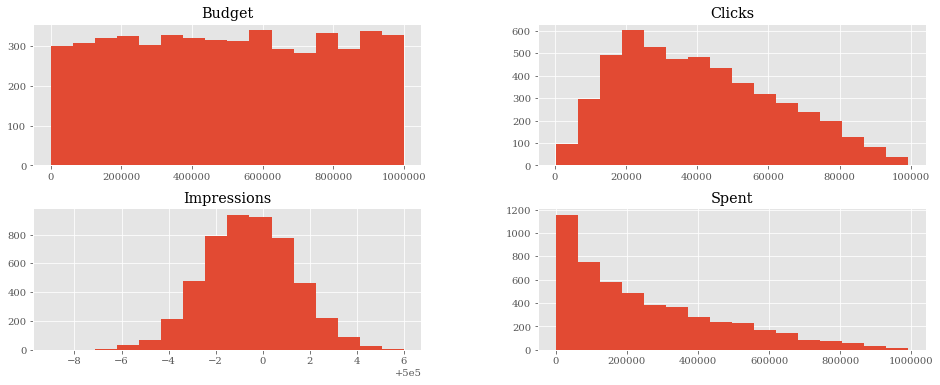

In [41]:
df[['Budget', 'Spent', 'Clicks', 'Impressions']].hist(bins=16, figsize=(16, 6));
plt.show()

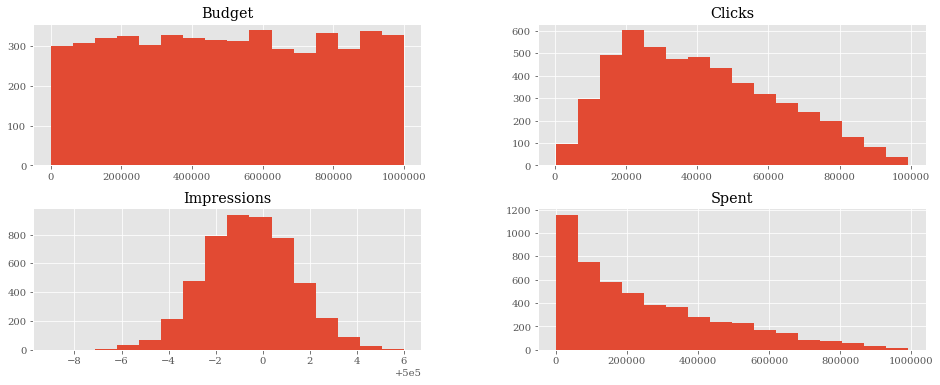

In [42]:
df.loc[df['Spent']>=0.8]
df[['Budget', 'Spent', 'Clicks', 'Impressions']].hist(bins=16, figsize=(16, 6));
plt.show()

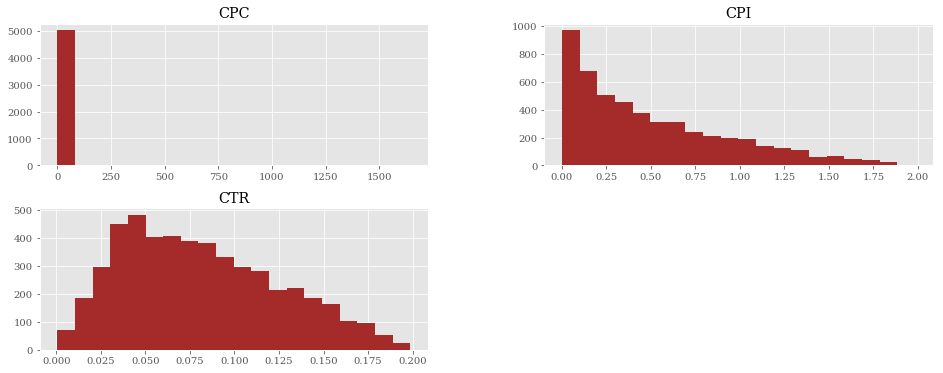

In [43]:
df[['CTR', 'CPC', 'CPI']].hist(bins=20, figsize=(16, 6), color='brown');
plt.show()

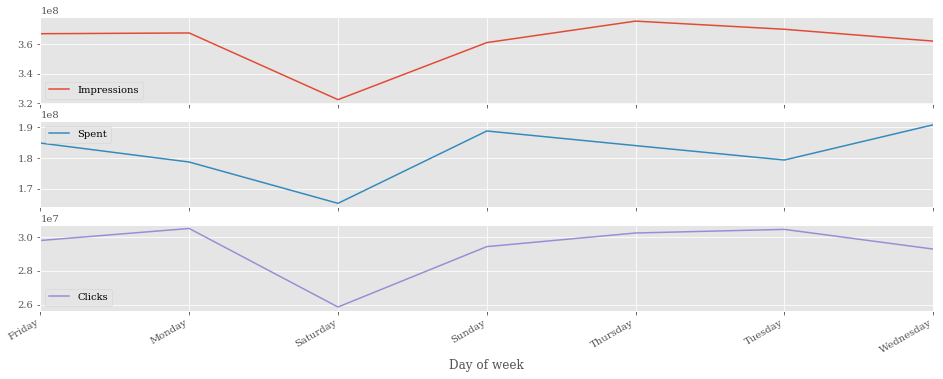

In [44]:
df_weekday = df.groupby(['Day of week']).sum()
df_weekday[['Impressions', 'Spent', 'Clicks']].plot(figsize=(16, 6), subplots=True);
plt.show()

In [45]:
pd.pivot_table(df,index=["Target Age"],columns=["Target Gender"],values=["Impressions","Clicks","Spent"],
                      aggfunc=[np.sum])

sum                                                 \
              Impressions                       Clicks                     
Target Gender           B         F         M        B        F        M   
Target Age                                                                 
20-25            43500002  35499980  46999962  3937579  2880950  4332521   
20-30            40499966  38499969  40999962  3660240  3073184  3198730   
20-35            42499941  34499964  39499928  3785265  2868948  3283332   
20-40            39499962  22499988  39499978  3217943  1961727  3505479   
20-45             8999985   9999986   3499987   647683   685416   373374   
25-30            44999944  44999938  45499947  3701788  4136469  3751987   
25-35            40499948  34499969  39999959  3316267  2756304  3166327   
25-40            32499972  37999944  34999971  2438207  3074751  2981992   
25-45            35499959  32999954  37499956  2955678  2628855  3150184   
25-50             8499993   7499984   8499994   736315   526531   747418   
30-35            38499931  35499950  28999981  3089903  2736801  2381699   
30-40            46499961  35999960  37499958  3743974  2824709  2964714   
30-45            38999926  45499992  36499978  3149890  3669893  3146079   
30-50            29999955  27999998  40499957  2340125  2393559  3157016   
30-55            12499998   5000001  10499991  1227596   473670   973027   
35-40            33999971  38999977  37499974  2645017  2850881  2792063   
35-45            35999946  38499954  42999961  2870637  3388495  3641055   
35-50            34499957  36999946  33499980  2611599  2801152  2668975   
35-55            46999976  37000001  41999900  3874597  2857366  3319735   
35-60             7999993  10999989   7999989   697341   921142   641503   
40-45            44499992  41999983  38999967  3275109  3106504  3215563   
40-50            34499968  39499967  37999936  2955193  3266350  2919151   
40-55            40999933  42000000  32999984  3085210  3521283  2964905   
40-60            40499947  40499946  35999982  3062704  3127120  2702934   
40-65             5499999   8999996  10999980   478670   549635   901146   
45-50             6499991   7999989   8499996   365502   618913   714226   
45-55             4999996  11999985   6999992   376009   952294   647657   
45-60             8499994   8999996   7999974   615518   786823   644005   
45-65             5999980   8999989   9999989   511765   790498   810881   
45-70              999997    500000    999999   170741    52456    95399   

                                             
                  Spent                      
Target Gender         B         F         M  
Target Age                                   
20-25          24065668  19057995  25883654  
20-30          21199714  19640372  18903844  
20-35          19603224  14252326  19365032  
20-40          19386430  13464287  19538435  
20-45           4563163   4766684   1288624  
25-30          24116981  24969488  24199355  
25-35          22926615  19966637  17507155  
25-40          15644170  20811024  16140755  
25-45          16980015  16359036  16593054  
25-50           5925055   2785218   5141361  
30-35          16525006  17613582  11714195  
30-40          20404065  18578892  17828786  
30-45          21606527  19088998  15783928  
30-50          13763209  16129706  22598436  
30-55           6188634   1305410   4299927  
35-40          20469489  16241929  20346893  
35-45          18629399  20555279  21852767  
35-50          16701417  22405160  14412302  
35-55          25677729  17593303  20427466  
35-60           2605901   4705664   3643016  
40-45          21545390  21596828  20274765  
40-50          17740895  21766099  17517045  
40-55          20449218  23145329  16751859  
40-60          22176001  16580569  20760924  
40-65           2887285   4848990   6727900  
45-50           2881790   2883111   5687325  
45-55           1826856   7700340   3455367  
45-60      